In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from reinforce_learning import Agent
from dataset import Dataset
from features import StrategiesSignals

In [2]:
TICKER = "BTCUSDT"
data_binance = Dataset()
data = data_binance.get_data(days=90, ticker=TICKER, ts='1H')

In [3]:
data['reward'] = data['close'].pct_change().shift(-1)

# Create Features

## Mean reversing sigma

In [4]:
# We need take best rules
data['mean_reversing_sigma'] = StrategiesSignals.mean_reversing_sigma(
        data=data,
        sigma=1,
        lag=1,
        window_ma=100,
        window_std=100
    )

## Mean Reversing

In [5]:
data['mean_reversin'] = StrategiesSignals.mean_reversing(data=data, window=200)

## Momentum

In [6]:
data['momentum'] = StrategiesSignals.momentum(df=data['close'].values, seq=2)

In [7]:
# What is min max scaller?
scaler = MinMaxScaler()
scaler.fit(data.drop(['reward'], axis=1).values)

MinMaxScaler()

In [8]:
train = pd.DataFrame(
    scaler.transform(data
                        .drop(['reward'], axis=1)
                        .values)
)
train.head(10)

,0,1,2,3,4,5,6,7,8
0,0.280552,0.268392,0.287078,0.277297,0.047063,0.5,0.0,0.5,0.5
1,0.277296,0.283911,0.290136,0.292913,0.070480,0.5,0.0,0.5,0.5
2,0.292912,0.280848,0.278155,0.266516,0.066392,0.5,0.0,0.5,0.5
3,0.266515,0.252537,0.251928,0.249987,0.179766,0.5,0.0,0.5,0.0
4,0.249987,0.252260,0.258559,0.253486,0.112944,0.5,0.0,0.5,0.5
5,0.253484,0.252238,0.267970,0.267796,0.065107,0.5,0.0,0.5,1.0
6,0.267795,0.265671,0.279079,0.278554,0.082177,0.5,0.0,0.5,0.5
7,0.278553,0.264470,0.278554,0.279081,0.056390,0.5,0.0,0.5,0.5
8,0.279080,0.268949,0.284885,0.279571,0.055858,0.5,0.0,0.5,0.5
9,0.279571,0.267355,0.283941,0.273141,0.050146,0.5,0.0,0.5,0.5


In [9]:
train.loc[:, 'time'] = data.index
train.loc[:, 'open_price'] = data['close'].values
train.loc[:, 'close_price'] = data['close'].shift(-1).values
train.loc[:, 'reward'] = train['close_price'] - train['open_price']
train.head(2)

,0,1,2,3,4,5,6,7,8,time,open_price,close_price,reward
0,0.280552,0.268392,0.287078,0.277297,0.047063,0.5,0.0,0.5,0.5,2021-06-19 01:00:00,35744.10,36110.43,366.33
1,0.277296,0.283911,0.290136,0.292913,0.070480,0.5,0.0,0.5,0.5,2021-06-19 02:00:00,36110.43,35491.18,-619.25


 26%|██▋       | 26/99 [00:00<00:00, 215.43it/s]

Episode: 1/20


 10%|█         | 10/99 [00:00<00:01, 87.40it/s]

{'epoch': 1, 'total_profit': -1082.5199999999968}
Episode: 2/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 2, 'total_profit': -1909.8900000000067}
Episode: 3/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 3, 'total_profit': -872.2499999999964}
Best result: -872.2499999999964
1_hour_bitcoin_test
Episode: 4/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 4, 'total_profit': -2907.6799999999967}
Episode: 5/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 5, 'total_profit': -2563.5700000000143}
Episode: 6/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 6, 'total_profit': -3080.1600000000144}
Episode: 7/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 7, 'total_profit': -2381.88000000003}
Episode: 8/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 8, 'total_profit': -4319.999999999996}
Episode: 9/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 9, 'total_profit': -2539.6800000000258}
Episode: 10/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 10, 'total_profit': -2402.4100000000217}
Episode: 11/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 11, 'total_profit': -1686.4000000000196}
Episode: 12/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 12, 'total_profit': -1854.3399999999783}
Episode: 13/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 13, 'total_profit': -1303.4100000000071}
Episode: 14/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 14, 'total_profit': -4057.2599999999984}
Episode: 15/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 15, 'total_profit': -4408.520000000008}
Episode: 16/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 16, 'total_profit': -2993.660000000007}
Episode: 17/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 17, 'total_profit': -3646.4000000000124}
Episode: 18/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 18, 'total_profit': -3963.9000000000124}
Episode: 19/20


  0%|          | 0/99 [00:00<?, ?it/s]

{'epoch': 19, 'total_profit': -1187.5000000000327}
Episode: 20/20


100%|██████████| 99/99 [00:11<00:00,  8.54it/s]


{'epoch': 20, 'total_profit': -2571.120000000021}


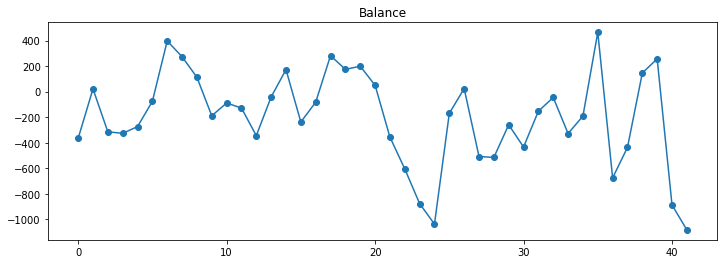

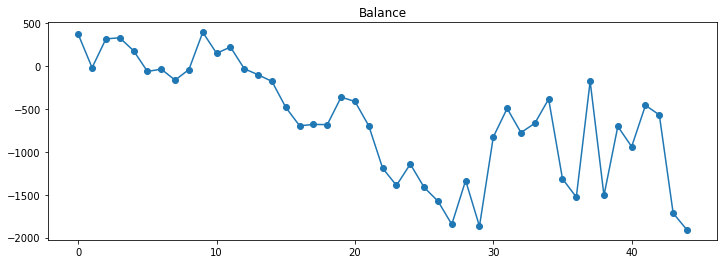

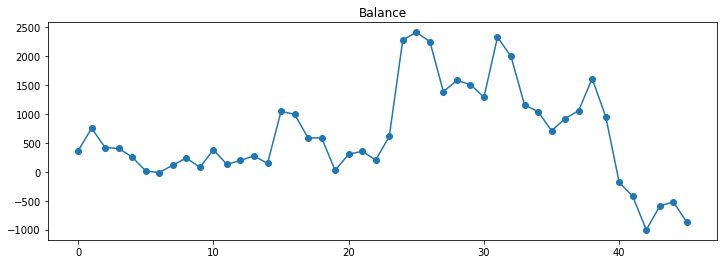

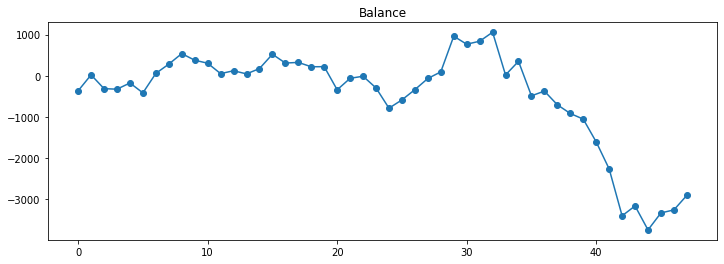

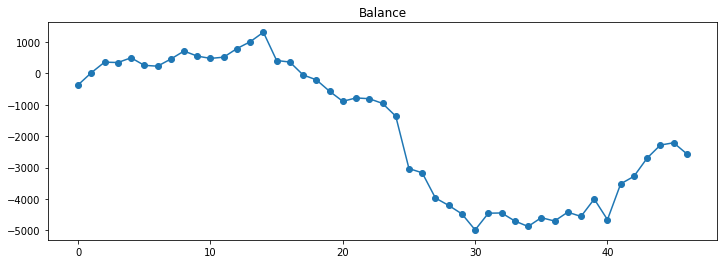

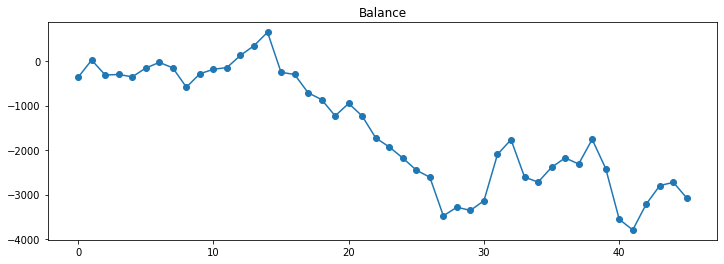

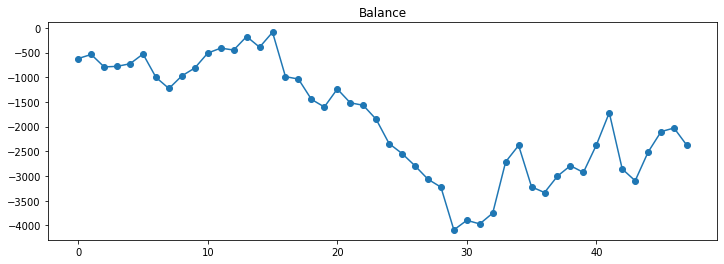

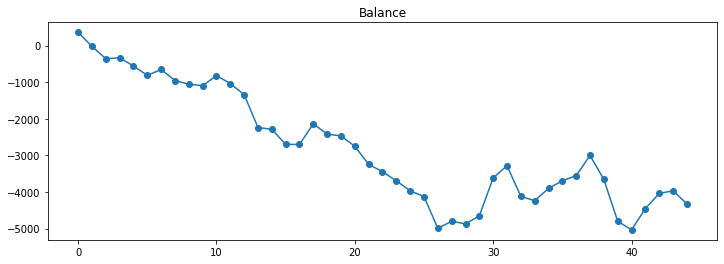

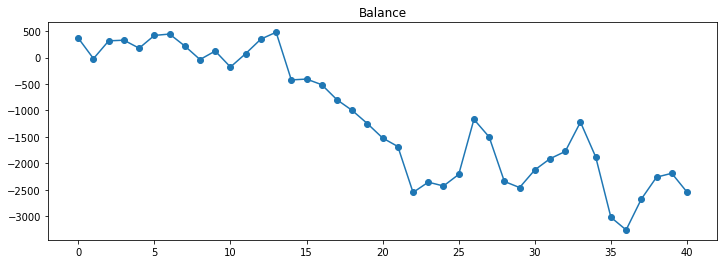

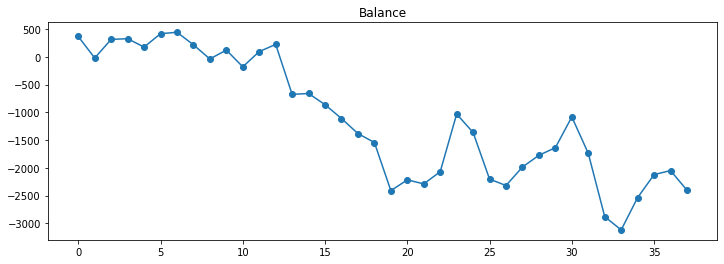

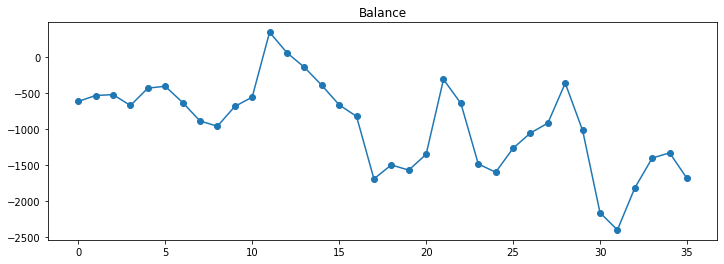

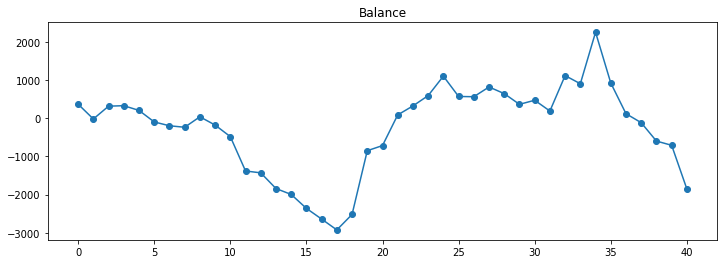

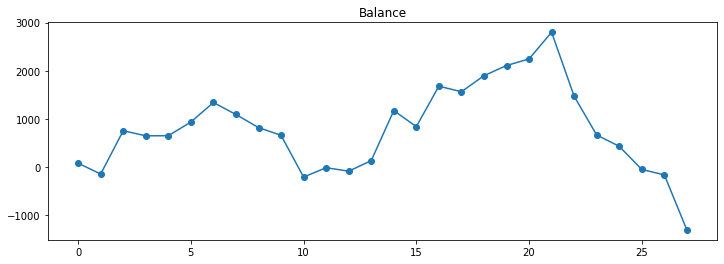

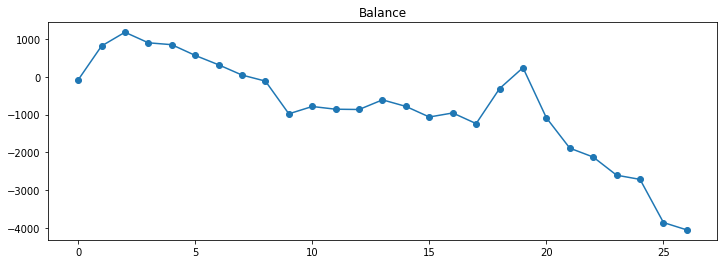

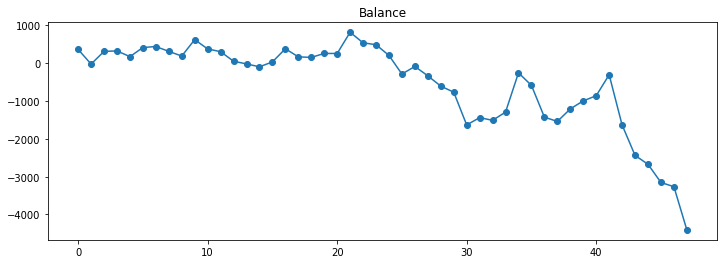

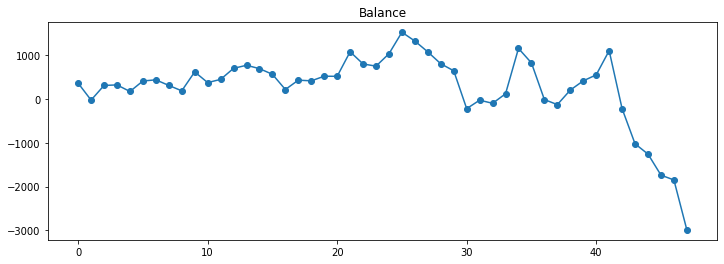

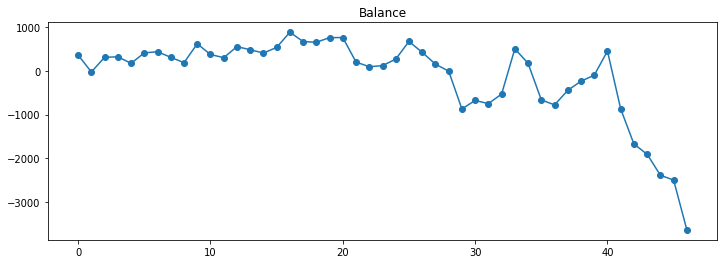

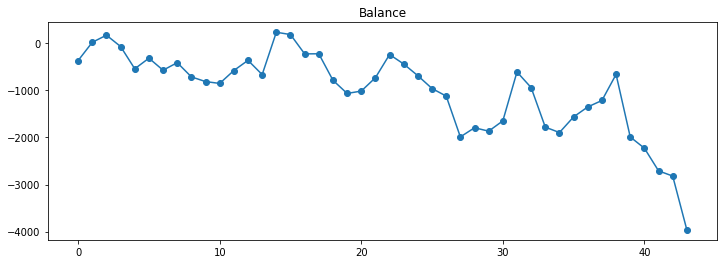

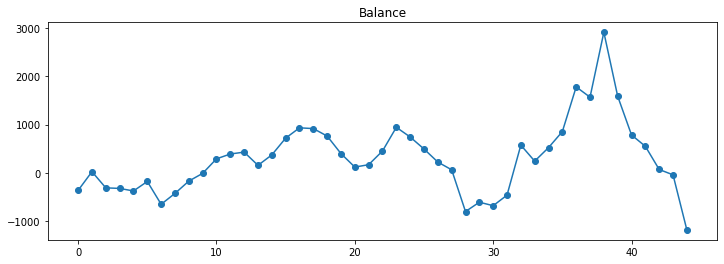

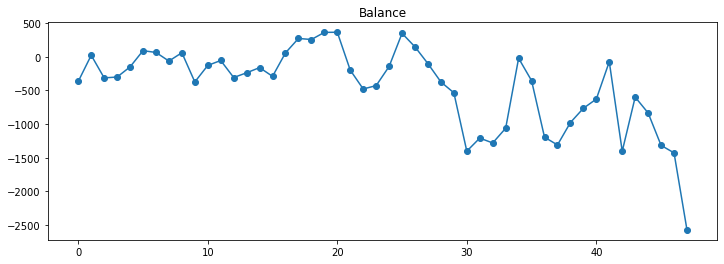

In [11]:
BATCH_SIZE = 200 # bach size - for neural network. In important to learn RF
MEMORY_SIZE = 2000 # Experiece 
ACTION_SPACE = [0, 1, 2]  # short, hold, buy
EPISODES = 20 # Hiw many times we lear RF
X_VAR = train.drop(['reward', 'open_price', 'close_price', 'time'], axis=1).columns
WINDOW = len(X_VAR)
Y_VAR = ['reward']
ARCITECTURE = (256, 256)
horizon = '1'
trader = Agent(
    name='{}_hour_bitcoin_test'.format(horizon),
    window=0,
    type_model="trader_1",  # forward_net, trader_0, trader_1
    data=train.dropna().head(100),
    window_size=WINDOW,
    batch_size=BATCH_SIZE,
    action_space=ACTION_SPACE,
    episodes=EPISODES,
    memory_size=MEMORY_SIZE,
    X_var=X_VAR,
    Y_var=Y_VAR,
    architecture=ARCITECTURE
)
trader.train(load_model=False)

In [23]:
print(X_VAR)

Index([0, 1, 2, 3, 4, 5], dtype='object')


In [12]:
test = train.dropna().head(100)